In [0]:
import numpy as np
import cvxopt
import matplotlib.pyplot as plt
import cvxopt.solvers as solve

In [0]:
n_samples = 100
x = np.random.uniform(0,1,(n_samples ,2))
d = []
c1 = []
c2 = []
for i in range(n_samples):
  if x[i][1] < (0.2 * np.sin(10*x[i][0])) + 0.3:
    d.append(1)
    c1.append(x[i])
  elif (x[i][1] - 0.8)**2 + (x[i][0] - 0.5)**2 < 0.15**2:
    d.append(1)
    c1.append(x[i])
  else:
    d.append(-1)
    c2.append(x[i])

In [0]:
def linear_kernal(x, y):
  return np.dot(x, y)

def polynomial_kernal(x, y, p=5):
  return (1 + np.dot(x, y)) ** p

def gaussian_kernal(x, y, sigma=5.0):
  return np.exp(-np.linalg.norm(x-y)**2 / (2 * (sigma ** 2)))

In [0]:
y = np.asarray(d).astype(float)
# polynomial kernal
K = np.zeros((n_samples, n_samples))
for i in range(n_samples):
  for j in range(n_samples):
    K[i,j] = polynomial_kernal(x[i], x[j])

In [0]:
P = cvxopt.matrix(np.outer(y,y) * K)
q = cvxopt.matrix(np.ones(n_samples) * -1)
A = cvxopt.matrix(y, (1,n_samples))
b = cvxopt.matrix(0.0)
G = cvxopt.matrix(np.diag(np.ones(n_samples) * -1))
h = cvxopt.matrix(np.zeros(n_samples))

#solve QP problem
solution = solve.qp(P, q, G, h, A, b)

     pcost       dcost       gap    pres   dres
 0: -4.4346e+01 -1.3120e+02  5e+02  2e+01  3e+00
 1: -1.8161e+02 -3.5245e+02  3e+02  9e+00  2e+00
 2: -4.6271e+02 -6.2402e+02  2e+02  6e+00  1e+00
 3: -8.4000e+02 -1.0649e+03  3e+02  6e+00  1e+00
 4: -3.2961e+03 -3.6548e+03  4e+02  5e+00  1e+00
 5: -7.2616e+03 -7.8451e+03  7e+02  5e+00  1e+00
 6: -1.4508e+04 -1.6394e+04  2e+03  5e+00  9e-01
 7: -2.7314e+04 -3.3210e+04  6e+03  4e+00  8e-01
 8: -3.4527e+04 -4.2029e+04  8e+03  3e+00  6e-01
 9: -4.3792e+04 -5.0499e+04  7e+03  7e-01  1e-01
10: -4.4857e+04 -4.7673e+04  3e+03  3e-01  5e-02
11: -4.5397e+04 -4.5680e+04  3e+02  7e-03  1e-03
12: -4.5556e+04 -4.5568e+04  1e+01  1e-04  2e-05
13: -4.5560e+04 -4.5560e+04  2e-01  1e-06  2e-07
14: -4.5560e+04 -4.5560e+04  5e-03  1e-08  2e-09
Optimal solution found.


In [0]:
# Lagrange Multipliers
alpha = np.ravel(solution['x'])
svs = alpha > 1e-5
sv1_x = []
sv1_y = []
sv2_x = []
sv2_y = []
for i in range(n_samples):
  if alpha[i] > 1e-5:
    if y[i] == 1:
      sv1_x.append(x[i])
      sv1_y.append(y[i])
    if y[i] == -1:
      sv2_x.append(x[i])
      sv2_y.append(y[i])

sv_x = sv1_x + sv2_x
sv_y = sv1_y + sv2_y

In [0]:
theta = sv_y[1]
for i in range(n_samples):
    theta -= alpha[i]*y[i]*polynomial_kernal(x[i], sv_x[1])

In [0]:
x_coord = np.linspace(0.0, 1.0, num=1000)
y_coord = np.linspace(0.0, 1.0, num=1000)
h = []
h_plus = []
h_minus = []



for i in range(len(x_coord)):
    for j in range(len(y_coord)):
        descriminant = theta
        for k in range(n_samples):
            descriminant += alpha[k]*y[k]*polynomial_kernal(x[k], np.asarray([x_coord[i], y_coord[j]]))
        if -0.1 < descriminant < 0.1:
            h.append([x_coord[i], y_coord[j]])
        elif 0.9 < descriminant < 1.1:
            h_plus.append([x_coord[i], y_coord[j]])
        elif -1.1 < descriminant < -0.9:
            h_minus.append([x_coord[i], y_coord[j]])

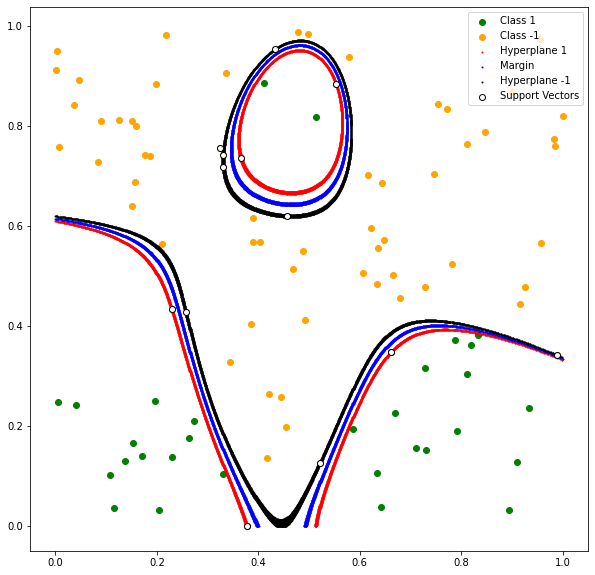

In [0]:
fig, ax = plt.subplots(figsize=(10,10))
plt.scatter(*zip(*c1), c = 'green', label = 'Class 1')
plt.scatter(*zip(*c2), c = 'orange', label = 'Class -1')
plt.scatter(*zip(*h_plus), c = 'red',s=1, label = 'Hyperplane 1')
plt.scatter(*zip(*h), c = 'blue',s=1, label = 'Margin')
plt.scatter(*zip(*h_minus), c = 'black', s=1, label = 'Hyperplane -1')
plt.scatter(*zip(*sv_x),c = 'white',edgecolors='black',label='Support Vectors')
plt.legend(loc = 'best')
plt.show()